In [663]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

import keras
from keras import layers

import numpy as np
import matplotlib.pyplot as plt

In [664]:
from keras import backend as K
print(K.backend())

tensorflow


In [665]:
# Create the model
inputs = keras.Input(shape=(3072,))
x = layers.Dense(1024, activation="relu")(inputs)
x = layers.Dense(512, activation="relu")(x)
x = layers.Dense(256, activation="relu")(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs, name="cifar10_model")

In [666]:
model.summary()

Model: "cifar10_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_72 (InputLayer)     │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_329 (Dense)               │ (None, 1024)           │     3,146,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_330 (Dense)               │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_331 (Dense)               │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_332 (Dense)               │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,805,450 (14.52 MB)

 Trainable params: 3,805,450 (14.52 MB)

 Non-trainable params: 0 (0.00 B)

In [667]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

x_train = x_train.reshape(50000, 3072).astype("float32") / 255
x_test = x_test.reshape(10000, 3072).astype("float32") / 255

In [668]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(),
    metrics=["accuracy"],
)

In [669]:
history = model.fit(x_train, y_train, batch_size=500, epochs=15, validation_split=0.2)

Epoch 1/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 0.1884 - loss: 2.3803 - val_accuracy: 0.3347 - val_loss: 1.8752
Epoch 2/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - accuracy: 0.3492 - loss: 1.8253 - val_accuracy: 0.3883 - val_loss: 1.7282
Epoch 3/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - accuracy: 0.3890 - loss: 1.7099 - val_accuracy: 0.3983 - val_loss: 1.6920
Epoch 4/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - accuracy: 0.4147 - loss: 1.6365 - val_accuracy: 0.4175 - val_loss: 1.6418
Epoch 5/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - accuracy: 0.4433 - loss: 1.5682 - val_accuracy: 0.4337 - val_loss: 1.5914
Epoch 6/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - accuracy: 0.4503 - loss: 1.5332 - val_accuracy: 0.4345 - val_loss: 1.5828
Epoch 7/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - accuracy: 0.4628 - loss: 1.5060 - val_accuracy: 0.4548 - val_loss: 1.5524
Epoch 8/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.4794 - loss: 1.4664 - val_accuracy: 0.4672 - v

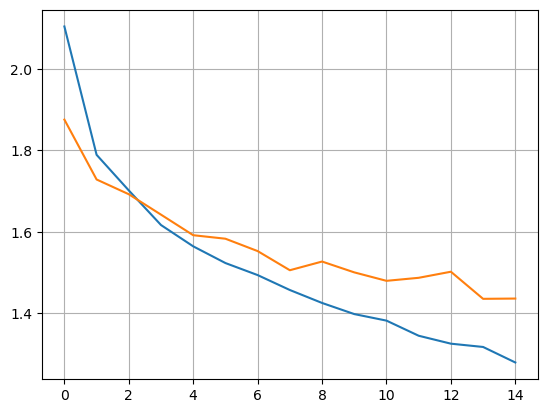

In [670]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.grid()
plt.show()

In [671]:
test_scores = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

313/313 - 1s - 3ms/step - accuracy: 0.5008 - loss: 1.4133
Test loss: 1.4132708311080933
Test accuracy: 0.5008000135421753


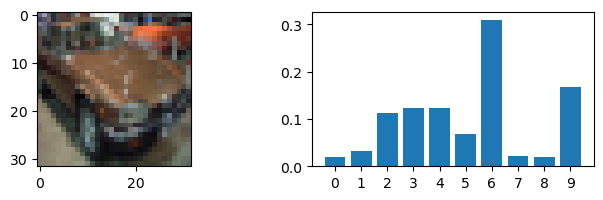

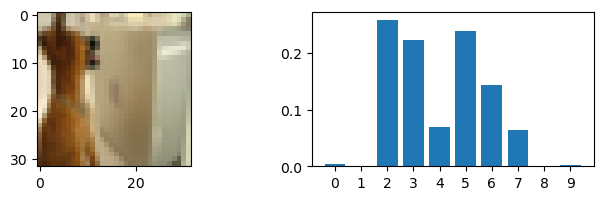

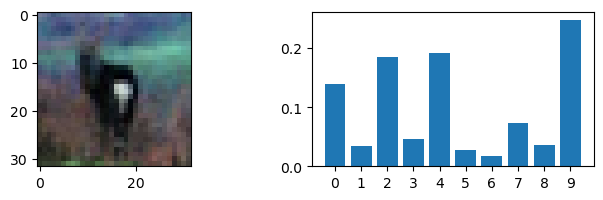

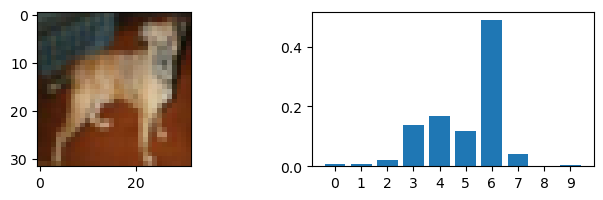

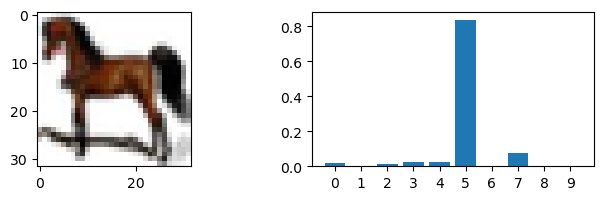

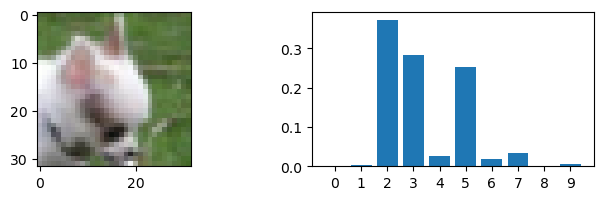

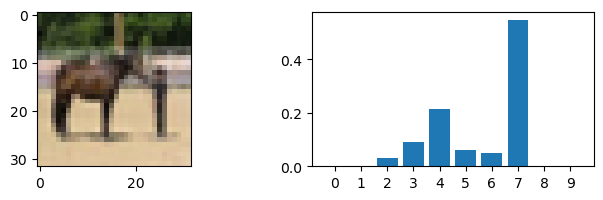

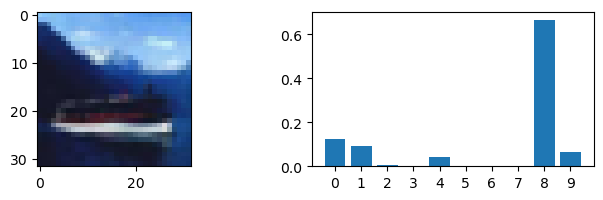

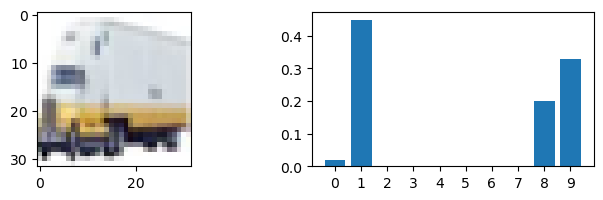

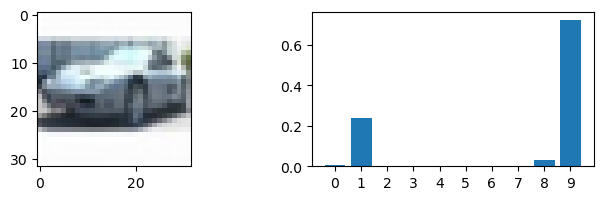

In [672]:
x = x_test
y = model(x)
start = 2000

for k in range(10):
    plt.figure(figsize=(8, 2))
    plt.subplot(1,2,1)
    plt.imshow(x[start+k].reshape((32, 32,3)), cmap='gray')
    ind = np.arange(0, 10)
    plt.subplot(1,2,2)
    plt.bar(ind, y[start+k].numpy().flatten())
    plt.xticks(range(10))